In [ ]:
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
     |████████████████████████████████| 47.1 MB 11.5 MB/s 
     |████████████████████████████████| 190 kB 5.1 MB/s 
Cloning into 'mmdetection'...
remote: Enumerating objects: 24959, done.
remote: Total 24959 (delta 0), reused 0 (delta 0), pack-reused 24959
Receiving objects: 100% (24959/24959), 37.76 MiB | 32.11 MiB/s, done.
Resolving deltas: 100% (17500/17500), done.
running install
running bdist_egg
running egg_info
creating mmdet.egg-info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
writing manifest file 'mmdet.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'mmdet.egg-info/SOUR

In [ ]:
!mkdir ./data
!wget -O ./data/Traffic.mp4 https://github.com/HyeBin-Hub/Mask_R-CNN_Object_Detection/blob/main/MMDetection_Mask_R-CNN_Object_Detection/images/Traffic.mp4?raw=true

mkdir: cannot create directory ‘./data’: File exists
--2022-06-20 10:42:18--  https://github.com/HyeBin-Hub/Mask_R-CNN_Object_Detection/blob/main/MMDetection_Mask_R-CNN_Object_Detection/images/Traffic.mp4?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/HyeBin-Hub/Mask_R-CNN_Object_Detection/raw/main/MMDetection_Mask_R-CNN_Object_Detection/images/Traffic.mp4 [following]
--2022-06-20 10:42:18--  https://github.com/HyeBin-Hub/Mask_R-CNN_Object_Detection/raw/main/MMDetection_Mask_R-CNN_Object_Detection/images/Traffic.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HyeBin-Hub/Mask_R-CNN_Object_Detection/main/MMDetection_Mask_R-CNN_Object_Detection/images/Traffic.mp4 [following]
--2022-06-20 10:42:18--  https://raw.githubusercontent.com/Hy

In [ ]:
!cd mmdetection;mkdir pretrained_model
!wget -O ./mmdetection/pretrained_model/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r101_fpn_1x_coco/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth

--2022-06-20 10:46:27--  https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r101_fpn_1x_coco/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254089599 (242M) [application/octet-stream]
Saving to: ‘./mmdetection/pretrained_model/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth’

./mmdetection/pretr 100%[===================>] 242.32M  8.32MB/s    in 31s     

2022-06-20 10:46:58 (7.89 MB/s) - ‘./mmdetection/pretrained_model/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth’ saved [254089599/254089599]



In [ ]:
from mmdet.apis import init_detector,inference_detector

config_file="/content/mmdetection/configs/mask_rcnn/mask_rcnn_r101_fpn_1x_coco.py"
pre_train_model_file="/content/mmdetection/pretrained_model/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth"

model=init_detector(config_file,pre_train_model_file)

load checkpoint from local path: /content/mmdetection/pretrained_model/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth


In [ ]:
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }
colors = list(
    [[0, 255, 0],
     [0, 0, 255],
     [255, 0, 0],
     [0, 255, 255],
     [255, 255, 0],
     [255, 0, 255],
     [80, 70, 180],
     [250, 80, 190],
     [245, 145, 50],
     [70, 150, 250]] )

In [ ]:
import numpy as np
import cv2

def get_detected_img(img_array,score_thr,model,is_caption,bbox,alpha):
  draw_img=img_array.copy()

  results=inference_detector(model,img_array)

  bboxes_inferences=results[0]
  maskes_inferences=results[1]

  for ind,bboxes_inference in enumerate(bboxes_inferences):
    if len(bboxes_inference)==0:
      continue

    maskes_inference=maskes_inferences[ind]

    for ind2,bbox_inference in enumerate(bboxes_inference):
      score = round(float(bbox_inference[4]),4)
      if score > score_thr:
        left=int(bbox_inference[0])
        top=int(bbox_inference[1])
        right=int(bbox_inference[2])
        bottom=int(bbox_inference[3])

        caption="{} : {}".format(labels_to_names_seq[ind],score)
        
        if bbox:
          cv2.rectangle(draw_img,(left,top),(right,bottom),(0,255,0),thickness=1)
          cv2.putText(draw_img,caption,(left,top-5),cv2.FONT_HERSHEY_SIMPLEX,0.4,(0,0,255),1)

        mask_inference=maskes_inference[ind2]

        masked_roi=draw_img[mask_inference]

        color_index=np.random.randint(0,len(colors)-1)
        color=colors[color_index]

        draw_img[mask_inference]=([0.3*color[0],0.3*color[1],0.3*color[2]]+alpha*masked_roi).astype(np.uint8)

        if is_caption:
          print(caption)

  return draw_img

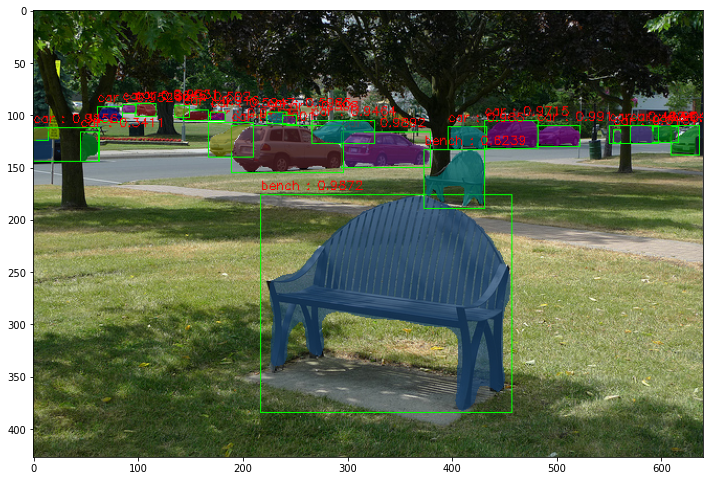

In [ ]:
import matplotlib.pyplot as plt

img_arr = cv2.imread('/content/mmdetection/demo/demo.jpg')

detected_img=get_detected_img(img_arr,0.3,model,False,True,0.3)
detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(detected_img)

In [ ]:
import time

def get_detected_video(input_video_path,output_video_path,score_thr,model):

  cap=cv2.VideoCapture(input_video_path)

  codec=cv2.VideoWriter_fourcc(*"XVID")

  video_fps=cap.get(cv2.CAP_PROP_FPS)

  video_size=(round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

  video_write=cv2.VideoWriter(output_video_path,codec,video_fps,video_size)

  frame_cnt=int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  print("총 Frame 수 : ",frame_cnt)

  b_time=time.time()

  while 1:
    hasFrame,ImgFrame=cap.read()

    if not hasFrame:
      print("더 이상 처리할 Frame이 없습니다 ")
      break

    start_time=time.time()

    detected_img=get_detected_img(ImgFrame,0.3,model,False,True,0.3)

    print("Frame별 detection 수행 시간 : ",round(time.time()-start_time,4))

    video_write.write(detected_img)

  cap.release()
  video_write.release()

  print("최종 detection 완료 수행 시간  : ",round(time.time()-b_time,4))

In [ ]:
get_detected_video("/content/data/Traffic.mp4","/content/data/Traffic_out.mp4",0.3,model)

총 Frame 수 :  480
Frame별 detection 수행 시간 :  0.3222
Frame별 detection 수행 시간 :  0.3094
Frame별 detection 수행 시간 :  0.314
Frame별 detection 수행 시간 :  0.3033
Frame별 detection 수행 시간 :  0.329
Frame별 detection 수행 시간 :  0.3217
Frame별 detection 수행 시간 :  0.3112
Frame별 detection 수행 시간 :  0.3185
Frame별 detection 수행 시간 :  0.3164
Frame별 detection 수행 시간 :  0.3054
Frame별 detection 수행 시간 :  0.3045
Frame별 detection 수행 시간 :  0.3128
Frame별 detection 수행 시간 :  0.3192
Frame별 detection 수행 시간 :  0.326
Frame별 detection 수행 시간 :  0.3218
Frame별 detection 수행 시간 :  0.3215
Frame별 detection 수행 시간 :  0.3339
Frame별 detection 수행 시간 :  0.31
Frame별 detection 수행 시간 :  0.3155
Frame별 detection 수행 시간 :  0.2985
Frame별 detection 수행 시간 :  0.3139
Frame별 detection 수행 시간 :  0.3003
Frame별 detection 수행 시간 :  0.2959
Frame별 detection 수행 시간 :  0.3015
Frame별 detection 수행 시간 :  0.2931
Frame별 detection 수행 시간 :  0.308
Frame별 detection 수행 시간 :  0.3017
Frame별 detection 수행 시간 :  0.3112
Frame별 detection 수행 시간 :  0.3223
Frame별 detection 수행 시간 :  0.3176